In [2]:
# import lightgbm as lgb
import sklearn
import pandas as pd
import numpy as np
import csv
from sklearn import cluster
from sklearn.cluster import KMeans
# from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import *
from IPython.display import display
pd.options.display.max_columns = None
from sklearn.manifold import TSNE
# import plotly.plotly as py
# import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D

## Preprocess

In [3]:
df = pd.read_csv('data/FX2.csv')
# df = df.filter(['customerID','ACCT_BAL_TWD_MY','ACCT_BAL_TWD_FY','ACCT_BAL_TWD_MF','FIN','Insight_Cha_001_1','Insight_Cha_007_1','ONLINE_SHP_IND'])
# df= df.drop(['PAGEID','PAGENAME','PAGE','FX_FLG','VISITDATETIME','CUST_START_DT'],axis=1)
df

,Customerno,doubleCC_ind,GOV_TEAC_IND,CHILDREN_CN,EDU_CODE,INCOME_RANGE_CODE,WORK_YEARS,WORLD_CARD_IND_ENCODE,GENDER_CODE_ENCODE,PAYROLL_ACCT_IND_ENCODE,PERSONAL_NET_FETW_IND_ENCODE,PERSONAL_NET_BANK_IND,INSURE_IND_ENCODE,MF_IND_ENCODE,WM_CLUB_MEM_IND_ENCODE,VIP_IND,SHP,TVL_IND_ENCODE,TVL,ONLINE_SHP_IND_ENCODE,FIN,ACCT_BAL_TWD_MY,ACCT_BAL_TWD_FY,ACCT_BAL_TWD_MF,TVL_AMT,Insight_Cha_001_1,Insight_Cha_002_2,Insight_Cha_003_3,Insight_Cha_004_1,Insight_Cha_005_1,Insight_Cha_006_1,Insight_Cha_007_1,Insight_Cha_008_1
0,1,1,0,0.0,3.0,2.0,13.83,1,1.0,0,1,1,0,0,0,0,1,0,0,1,1,23.0,23.0,NaN,0,23,8,0,2,0,0,76,0
1,2,0,1,0.0,3.0,2.0,0.00,0,1.0,0,1,1,0,0,0,0,1,0,0,1,0,0.0,NaN,NaN,0,3,14,0,4,2,0,0,0
2,4,0,1,0.0,2.0,2.0,4.50,0,1.0,1,1,1,1,0,1,1,0,0,0,1,1,10.0,280.0,NaN,0,104,27,0,10,1,0,3,0
3,8,0,0,0.0,3.0,1.0,2.08,0,1.0,0,1,1,1,0,0,0,1,0,0,1,1,6.0,NaN,NaN,0,3,5,0,2,1,0,0,0
4,12,0,0,0.0,3.0,3.0,0.00,0,1.0,0,1,1,1,1,1,1,0,0,0,0,1,64.0,283.0,80.0,0,47,70,0,0,0,0,1,0
5,13,0,0,0.0,4.0,2.0,10.75,1,1.0,0,1,1,1,1,1,1,1,0,0,1,1,2.0,78.0,60.0,0,229,134,6,4,2,0,2,0
6,17,0,0,0.0,5.0,3.0,0.00,1,1.0,0,1,1,1,0,1,1,0,0,0,0,1,0.0,NaN,NaN,0,1,1,0,0,0,0,0,0
7,18,0,0,0.0,NaN,1.0,NaN,0,1.0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,0,29,33,0,0,0,0,0,0
8,22,0,0,0.0,5.0,1.0,40.00,0,0.0,0,1,1,0,1,0,1,0,0,0,0,1,6.0,20.0,141.0,0,13,4,0,5,0,0,2,0
9,23,0,0,0.0,NaN,1.0,NaN,0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,0,0,2,0,3,0,0,0,0


In [4]:
# df.contact_seg.unique()

In [5]:
df = df.fillna(-1)
# df = df.astype('str')
# df = df.replace(to_replace='是',value=1)
# df = df.replace(to_replace='否',value=0)
# df = df.replace(to_replace='Y',value=1)
# df = df.replace(to_replace='N',value=0)
# df = df.replace(to_replace='M',value=1)
# df = df.replace(to_replace='F',value=0)
# df = df.replace(to_replace='北北基',value=1)
# df = df.replace(to_replace='中彰投',value=2)
# df = df.replace(to_replace='桃竹苗',value=3)
# df = df.replace(to_replace='雲嘉南',value=4)
# df = df.replace(to_replace='高屏',value=5)
# df = df.replace(to_replace='花東',value=6)
# df = df.replace(to_replace='其他',value=7)

# df['ONLINE_SHP_IND'] =  df['ONLINE_SHP_IND'].str.replace('是','1')
# df['ONLINE_SHP_IND'] =  df['ONLINE_SHP_IND'].str.replace('否','0')
# df['ONLINE_SHP_IND'] = df['ONLINE_SHP_IND'].astype('int')
df['Customerno'] = df['Customerno'].astype('int')
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)
df

,Customerno,doubleCC_ind,GOV_TEAC_IND,CHILDREN_CN,EDU_CODE,INCOME_RANGE_CODE,WORK_YEARS,WORLD_CARD_IND_ENCODE,GENDER_CODE_ENCODE,PAYROLL_ACCT_IND_ENCODE,PERSONAL_NET_FETW_IND_ENCODE,PERSONAL_NET_BANK_IND,INSURE_IND_ENCODE,MF_IND_ENCODE,WM_CLUB_MEM_IND_ENCODE,VIP_IND,SHP,TVL_IND_ENCODE,TVL,ONLINE_SHP_IND_ENCODE,FIN,ACCT_BAL_TWD_MY,ACCT_BAL_TWD_FY,ACCT_BAL_TWD_MF,TVL_AMT,Insight_Cha_001_1,Insight_Cha_002_2,Insight_Cha_003_3,Insight_Cha_004_1,Insight_Cha_005_1,Insight_Cha_006_1,Insight_Cha_007_1,Insight_Cha_008_1
0,1,1,0,0.0,3.0,2.0,13.83,1,1.0,0,1,1,0,0,0,0,1,0,0,1,1,23.0,23.0,-1.0,0,23,8,0,2,0,0,76,0
1,2,0,1,0.0,3.0,2.0,0.00,0,1.0,0,1,1,0,0,0,0,1,0,0,1,0,0.0,-1.0,-1.0,0,3,14,0,4,2,0,0,0
2,4,0,1,0.0,2.0,2.0,4.50,0,1.0,1,1,1,1,0,1,1,0,0,0,1,1,10.0,280.0,-1.0,0,104,27,0,10,1,0,3,0
3,8,0,0,0.0,3.0,1.0,2.08,0,1.0,0,1,1,1,0,0,0,1,0,0,1,1,6.0,-1.0,-1.0,0,3,5,0,2,1,0,0,0
4,12,0,0,0.0,3.0,3.0,0.00,0,1.0,0,1,1,1,1,1,1,0,0,0,0,1,64.0,283.0,80.0,0,47,70,0,0,0,0,1,0
5,13,0,0,0.0,4.0,2.0,10.75,1,1.0,0,1,1,1,1,1,1,1,0,0,1,1,2.0,78.0,60.0,0,229,134,6,4,2,0,2,0
6,17,0,0,0.0,5.0,3.0,0.00,1,1.0,0,1,1,1,0,1,1,0,0,0,0,1,0.0,-1.0,-1.0,0,1,1,0,0,0,0,0,0
7,18,0,0,0.0,-1.0,1.0,-1.00,0,1.0,0,0,1,0,0,0,0,0,0,0,0,1,-1.0,-1.0,-1.0,0,29,33,0,0,0,0,0,0
8,22,0,0,0.0,5.0,1.0,40.00,0,0.0,0,1,1,0,1,0,1,0,0,0,0,1,6.0,20.0,141.0,0,13,4,0,5,0,0,2,0
9,23,0,0,0.0,-1.0,1.0,-1.00,0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,-1.0,-1.0,-1.0,0,0,2,0,3,0,0,0,0


In [6]:
X_train = df.drop(['Customerno'],axis=1)
# X_train.shape()
X_train = np.array(X_train)
X_train.shape

(81344, 32)

# PCA

In [ ]:
#tuning
clusts=25
components=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]#'mle'#3
alls=[]
allss=[]
for component in components:
# for clust in range(clusts):
#     for component in components:
    for clust in range(clusts):
        clust +=2
        print('==================',clust,'&',component,'==================')
        pca = PCA(n_components=component,iterated_power='auto', whiten=True,svd_solver="full",random_state=725035) #n_components='mle',395
        train_X_PCA = pca.fit_transform(X_train)

        clusters = KMeans(init='k-means++',n_init=clust*2,max_iter=350,precompute_distances='auto',algorithm='auto',random_state=725035
                         ,n_clusters=clust,n_jobs=-1,verbose=0) #11,305
        y_pred = clusters.fit_predict(train_X_PCA)
        me = silhouette_score(train_X_PCA[:int(len(train_X_PCA)/2)],y_pred[:int(len(train_X_PCA)/2)])
        print(me)
#         print(metrics.calinski_harabaz_score(X_train,y_pred),me )
        #15543.58322215207 0.7821804>0.7
        #306582.05108632887 0.7534802=>0.1
        #306582.05108632887 0.7534802=>0.05
        #306582.05108632887 0.7534802=>0.5
        #23453.970931823707 0.82148916=>0.8

        dfF = df
        # dfF2 = pd.DataFrame(y_pred)
        dfF = dfF.reset_index(drop=True)
        # dfA = pd.merge(dfF,dfF2,how='inner',left_index=True,right_index=True)
        dfF['res'] = pd.Series(y_pred)
        dfF['res']= dfF['res'].astype('int')
        # dfF

        all_=[]
        for i in range(clust):
            length = len(dfF[dfF['res']==i])
            all_.append(length)
#             print(length)
        kk = max(all_)
        kks = min(all_)
        alls.append(kk)
        allss.append(kk/kks)
        print(kk,kk/kks)
        if me <0.7:
            break
print(min(alls),min(allss))
# print(m)
#         display(dfF)
#8994.666666666666 #10、0.1
#4041 #9、0.8
#2698.4 #9、0.1
#2969.8 #8、0.1
#4155 # 8 0.8
# 3249.7 #7、0.1
#3408 #6、0.1
#3406 #5 0.1
#3850 # 4 0.8
#4113.0 #3 0.1
#4116 #3 0.8
#3406 越小越好
#3947

================== 2 & 0.01 ==================
0.9970976333476078
81343 81343.0
================== 3 & 0.01 ==================
0.9285095823081684
80604 80604.0
================== 4 & 0.01 ==================
0.8752577586531693
78589 78589.0
================== 5 & 0.01 ==================
0.8643557238359673
77956 77956.0
================== 6 & 0.01 ==================
0.8254237370820605
74657 74657.0
================== 7 & 0.01 ==================
0.8056708004121613
72606 72606.0
================== 8 & 0.01 ==================
0.7987414050800086
71665 71665.0
================== 9 & 0.01 ==================
0.7856915753795297
69992 69992.0
================== 10 & 0.01 ==================
0.7749120111376975
68460 68460.0
================== 11 & 0.01 ==================
0.7682256333872316
67517 67517.0
================== 12 & 0.01 ==================
0.7579296197147962
65902 65902.0
================== 13 & 0.01 ==================
0.7591614229616976
66103 66103.0
================== 14 & 0.01 =======

0.7030871281392884
56800 56800.0
================== 22 & 0.3 ==================
0.6976781611797673
55551 55551.0
================== 2 & 0.4 ==================
0.9970976333476078
81343 81343.0
================== 3 & 0.4 ==================
0.9285095823081684
80604 80604.0
================== 4 & 0.4 ==================
0.8752577586531693
78589 78589.0
================== 5 & 0.4 ==================
0.8643557238359673
77956 77956.0
================== 6 & 0.4 ==================
0.8254237370820605
74657 74657.0
================== 7 & 0.4 ==================
0.8056708004121613
72606 72606.0
================== 8 & 0.4 ==================
0.7987414050800086
71665 71665.0
================== 9 & 0.4 ==================
0.7856915753795297
69992 69992.0
================== 10 & 0.4 ==================
0.7749120111376975
68460 68460.0
================== 11 & 0.4 ==================
0.7682256333872316
67517 67517.0
================== 12 & 0.4 ==================
0.7579296197147962
65902 65902.0
===============

In [9]:
component=0.8
clust=5 #10
pca = PCA(n_components=component,iterated_power='auto', whiten=True,svd_solver="full",random_state=725035) #n_components='mle',395
train_X_PCA = pca.fit_transform(X_train)

clusters = KMeans(init='k-means++',n_init=10,max_iter=350,precompute_distances='auto',algorithm='auto',random_state=725035
                 ,n_clusters=clust,n_jobs=-1,verbose=0) #11,305
y_pred = clusters.fit_predict(train_X_PCA)
# print(metrics.calinski_harabaz_score(train_X_PCA,y_pred) , metrics.silhouette_score(train_X_PCA,y_pred))
me = silhouette_score(train_X_PCA[:int(len(train_X_PCA)/2)],y_pred[:int(len(train_X_PCA)/2)])
print(me)
#76517.39384138706 0.7235833019836279

0.8972330584944782


In [10]:
tsne = TSNE(n_components=3, verbose=1, n_iter=2000, perplexity=50,learning_rate=50,early_exaggeration=20).fit_transform(train_X_PCA)
# X_embeded = tsne.fit_transform(train_X_PCA)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 81344 samples in 0.125s...
[t-SNE] Computed neighbors for 81344 samples in 1.888s...
[t-SNE] Computed conditional probabilities for sample 1000 / 81344
[t-SNE] Computed conditional probabilities for sample 2000 / 81344
[t-SNE] Computed conditional probabilities for sample 3000 / 81344
[t-SNE] Computed conditional probabilities for sample 4000 / 81344
[t-SNE] Computed conditional probabilities for sample 5000 / 81344
[t-SNE] Computed conditional probabilities for sample 6000 / 81344
[t-SNE] Computed conditional probabilities for sample 7000 / 81344
[t-SNE] Computed conditional probabilities for sample 8000 / 81344
[t-SNE] Computed conditional probabilities for sample 9000 / 81344
[t-SNE] Computed conditional probabilities for sample 10000 / 81344
[t-SNE] Computed conditional probabilities for sample 11000 / 81344
[t-SNE] Computed conditional probabilities for sample 12000 / 81344
[t-SNE] Computed conditional probabilities for sa

In [11]:
dfF = df
# dfF2 = pd.DataFrame(y_pred)
dfF = dfF.reset_index(drop=True)
# dfA = pd.merge(dfF,dfF2,how='inner',left_index=True,right_index=True)
dfF['res'] = pd.Series(y_pred)
dfF['res']= dfF['res'].astype('int')
all_=[]
for i in range(clust):
    length = len(dfF[dfF['res']==i])
    all_.append(length)
    print(i,length)
# print(max(all_)) 

0 80510
1 44
2 269
3 520
4 1


In [ ]:
tsne.shape

In [12]:
dfT = pd.DataFrame(tsne)
dfT = pd.merge(dfF,dfT,how='inner',left_index=True,right_index=True)
dfT

,Customerno,doubleCC_ind,GOV_TEAC_IND,CHILDREN_CN,EDU_CODE,INCOME_RANGE_CODE,WORK_YEARS,WORLD_CARD_IND_ENCODE,GENDER_CODE_ENCODE,PAYROLL_ACCT_IND_ENCODE,PERSONAL_NET_FETW_IND_ENCODE,PERSONAL_NET_BANK_IND,INSURE_IND_ENCODE,MF_IND_ENCODE,WM_CLUB_MEM_IND_ENCODE,VIP_IND,SHP,TVL_IND_ENCODE,TVL,ONLINE_SHP_IND_ENCODE,FIN,ACCT_BAL_TWD_MY,ACCT_BAL_TWD_FY,ACCT_BAL_TWD_MF,TVL_AMT,Insight_Cha_001_1,Insight_Cha_002_2,Insight_Cha_003_3,Insight_Cha_004_1,Insight_Cha_005_1,Insight_Cha_006_1,Insight_Cha_007_1,Insight_Cha_008_1,res,0,1,2
0,1,1,0,0.0,3.0,2.0,13.83,1,1.0,0,1,1,0,0,0,0,1,0,0,1,1,23.0,23.0,-1.0,0,23,8,0,2,0,0,76,0,0,-10.130007,-4.029099,-8.060097
1,2,0,1,0.0,3.0,2.0,0.00,0,1.0,0,1,1,0,0,0,0,1,0,0,1,0,0.0,-1.0,-1.0,0,3,14,0,4,2,0,0,0,0,6.212071,-6.303407,-16.068188
2,4,0,1,0.0,2.0,2.0,4.50,0,1.0,1,1,1,1,0,1,1,0,0,0,1,1,10.0,280.0,-1.0,0,104,27,0,10,1,0,3,0,0,9.900472,20.359106,-3.329140
3,8,0,0,0.0,3.0,1.0,2.08,0,1.0,0,1,1,1,0,0,0,1,0,0,1,1,6.0,-1.0,-1.0,0,3,5,0,2,1,0,0,0,0,-6.823102,12.490310,-20.725548
4,12,0,0,0.0,3.0,3.0,0.00,0,1.0,0,1,1,1,1,1,1,0,0,0,0,1,64.0,283.0,80.0,0,47,70,0,0,0,0,1,0,0,8.990045,16.998594,-4.207201
5,13,0,0,0.0,4.0,2.0,10.75,1,1.0,0,1,1,1,1,1,1,1,0,0,1,1,2.0,78.0,60.0,0,229,134,6,4,2,0,2,0,0,5.460529,-6.048102,2.000362
6,17,0,0,0.0,5.0,3.0,0.00,1,1.0,0,1,1,1,0,1,1,0,0,0,0,1,0.0,-1.0,-1.0,0,1,1,0,0,0,0,0,0,0,-19.339884,-16.168207,-11.438959
7,18,0,0,0.0,-1.0,1.0,-1.00,0,1.0,0,0,1,0,0,0,0,0,0,0,0,1,-1.0,-1.0,-1.0,0,29,33,0,0,0,0,0,0,0,3.665634,8.402067,-13.976681
8,22,0,0,0.0,5.0,1.0,40.00,0,0.0,0,1,1,0,1,0,1,0,0,0,0,1,6.0,20.0,141.0,0,13,4,0,5,0,0,2,0,0,2.939634,-5.165151,21.296490
9,23,0,0,0.0,-1.0,1.0,-1.00,0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,-1.0,-1.0,-1.0,0,0,2,0,3,0,0,0,0,0,12.720855,-10.124983,18.652370


No handles with labels found to put in legend.


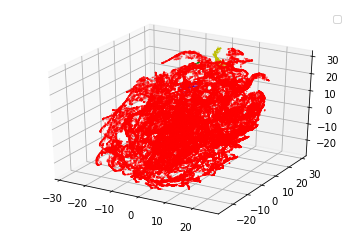

In [13]:
nums = [0,1,2,3,4]#[0,3,6,8,13]
colors =  ['r','g','b','y','m']
plots=[]
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i,num in enumerate(nums):
    col = colors[i]
    dfT2 = dfT[(dfT['res']==num)]
    dfT2 = dfT2.filter([0,1])
#     dfT2
#     label = dfT2['res'].values
#     label = np.array(label).shape
    tsne_x = np.array(dfT2.filter([0]))
    tsne_x = tsne_x.reshape(len(tsne_x),)
    tsne_y = np.array(dfT2.filter([1]))
    tsne_y = tsne_y.reshape(len(tsne_y),)
    tsne_z = np.array(dfT2.filter([2]))
    tsne_z = tsne_y.reshape(len(tsne_z),)
#     plt.scatter(tsne_x,tsne_y,c=col,s=0.2,label='group'+str(i+1))
    ax.scatter(tsne_x,tsne_y,tsne_z,s=0.2,c=col)
#     print(label.shape,tsne_.shape)
plt.legend()
# plt.savefig('result/tsne_5_group.jpg')
# py.iplot(plots)

In [60]:
len(tsne_y)

1889

ValueError: x and y must be the same size

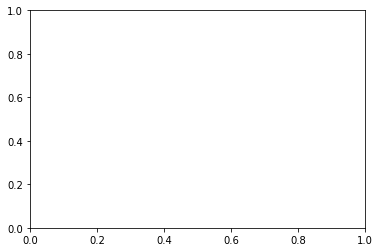

In [42]:
plt.scatter(tsne_,label,c='b',s=0.2)
plt.legend()

In [22]:
dfF = df
# dfF2 = pd.DataFrame(y_pred)
dfF = dfF.reset_index(drop=True)
# dfA = pd.merge(dfF,dfF2,how='inner',left_index=True,right_index=True)
dfF['res'] = pd.Series(y_pred)
dfF['res']= dfF['res'].astype('int')
all_=[]
for i in range(clust):
    length = len(dfF[dfF['res']==i])
    all_.append(length)
    print(i,length)
# print(max(all_)) 

0 65365
1 1
2 36
3 3738
4 92
5 6
6 911
7 11
8 8524
9 476
10 213
11 1
12 81
13 1889


In [23]:
dfF2 = dfF[(dfF['res']==0) | (dfF['res']==3) | (dfF['res']==6) | (dfF['res']==8) | (dfF['res']==13)]
dfF2

,Customerno,doubleCC_ind,GOV_TEAC_IND,CHILDREN_CN,EDU_CODE,INCOME_RANGE_CODE,WORK_YEARS,WORLD_CARD_IND_ENCODE,GENDER_CODE_ENCODE,PAYROLL_ACCT_IND_ENCODE,PERSONAL_NET_FETW_IND_ENCODE,PERSONAL_NET_BANK_IND,INSURE_IND_ENCODE,MF_IND_ENCODE,WM_CLUB_MEM_IND_ENCODE,VIP_IND,SHP,TVL_IND_ENCODE,TVL,ONLINE_SHP_IND_ENCODE,FIN,ACCT_BAL_TWD_MY,ACCT_BAL_TWD_FY,ACCT_BAL_TWD_MF,TVL_AMT,Insight_Cha_001_1,Insight_Cha_002_2,Insight_Cha_003_3,Insight_Cha_004_1,Insight_Cha_005_1,Insight_Cha_006_1,Insight_Cha_007_1,Insight_Cha_008_1,res
0,1,1,0,0.0,3.0,2.0,13.83,1,1.0,0,1,1,0,0,0,0,1,0,0,1,1,23.0,23.0,-1.0,0,23,8,0,2,0,0,76,0,0
1,2,0,1,0.0,3.0,2.0,0.00,0,1.0,0,1,1,0,0,0,0,1,0,0,1,0,0.0,-1.0,-1.0,0,3,14,0,4,2,0,0,0,0
2,4,0,1,0.0,2.0,2.0,4.50,0,1.0,1,1,1,1,0,1,1,0,0,0,1,1,10.0,280.0,-1.0,0,104,27,0,10,1,0,3,0,3
3,8,0,0,0.0,3.0,1.0,2.08,0,1.0,0,1,1,1,0,0,0,1,0,0,1,1,6.0,-1.0,-1.0,0,3,5,0,2,1,0,0,0,0
4,12,0,0,0.0,3.0,3.0,0.00,0,1.0,0,1,1,1,1,1,1,0,0,0,0,1,64.0,283.0,80.0,0,47,70,0,0,0,0,1,0,13
5,13,0,0,0.0,4.0,2.0,10.75,1,1.0,0,1,1,1,1,1,1,1,0,0,1,1,2.0,78.0,60.0,0,229,134,6,4,2,0,2,0,3
6,17,0,0,0.0,5.0,3.0,0.00,1,1.0,0,1,1,1,0,1,1,0,0,0,0,1,0.0,-1.0,-1.0,0,1,1,0,0,0,0,0,0,0
7,18,0,0,0.0,-1.0,1.0,-1.00,0,1.0,0,0,1,0,0,0,0,0,0,0,0,1,-1.0,-1.0,-1.0,0,29,33,0,0,0,0,0,0,0
8,22,0,0,0.0,5.0,1.0,40.00,0,0.0,0,1,1,0,1,0,1,0,0,0,0,1,6.0,20.0,141.0,0,13,4,0,5,0,0,2,0,3
9,23,0,0,0.0,-1.0,1.0,-1.00,0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,-1.0,-1.0,-1.0,0,0,2,0,3,0,0,0,0,0


In [24]:
dfF2.to_csv('pca_kmeans_clustering_res5.csv',index=False)

partial method

In [250]:
# for val in df.columns.values:
#     df_[val] = df[val].fillna(df[val].mean())
#     print(val,df[val].mean())

df_=df.dropna(axis=0,how='any')

# df_
df_['customerID'] = df_['customerID'].astype('int')
df_.drop_duplicates(inplace=True)
df_ = df_[df_.customerID!=10924]
# df_ = df_.drop(df_[df_.customerID==10924],axis=1)
df_

C:\Users\sas56\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sas56\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,customerID,ACCT_BAL_TWD_MY,ACCT_BAL_TWD_FY,ACCT_BAL_TWD_MF,FIN,Insight_Cha_001_1,Insight_Cha_007_1,ONLINE_SHP_IND
46,12,64.0,283.0,80.0,1,47,1,0
54,13,2.0,78.0,60.0,1,229,2,1
77,22,6.0,20.0,141.0,1,13,2,0
117,45,10.0,9.0,72.0,1,54,2,0
132,57,11.0,181.0,500.0,1,6,1,0
134,59,83.0,122.0,6376.0,1,39,4,1
157,80,9.0,28.0,239.0,1,9,0,0
170,99,8.0,94.0,204.0,1,7,1,0
179,100,5.0,45.0,96.0,1,61,0,0
222,121,7.0,10.0,15.0,1,23,0,0


In [251]:

X_train = df_.drop(['customerID'],axis=1)
X_train 

,ACCT_BAL_TWD_MY,ACCT_BAL_TWD_FY,ACCT_BAL_TWD_MF,FIN,Insight_Cha_001_1,Insight_Cha_007_1,ONLINE_SHP_IND
46,64.0,283.0,80.0,1,47,1,0
54,2.0,78.0,60.0,1,229,2,1
77,6.0,20.0,141.0,1,13,2,0
117,10.0,9.0,72.0,1,54,2,0
132,11.0,181.0,500.0,1,6,1,0
134,83.0,122.0,6376.0,1,39,4,1
157,9.0,28.0,239.0,1,9,0,0
170,8.0,94.0,204.0,1,7,1,0
179,5.0,45.0,96.0,1,61,0,0
222,7.0,10.0,15.0,1,23,0,0


## KMEANS

In [28]:
train_X = np.array(X_train)
train_X.shape

(41347, 60)

In [257]:
clust=3
y_pred = cluster.KMeans(n_clusters=clust,random_state=0).fit_predict(train_X)
# metrics.calinski_harabaz_score(train_X,y_pred)
metrics.silhouette_score(train_X,y_pred)

0.9388156104492312

In [258]:
# print(len(y_pred), len(df_))
dfF = df_
# dfF2 = pd.DataFrame(y_pred)
dfF = dfF.reset_index(drop=True)
# dfA = pd.merge(dfF,dfF2,how='inner',left_index=True,right_index=True)
dfF['res'] = pd.Series(y_pred)
dfF['res']= dfF['res'].astype('int')
# dfF
dfF

,customerID,ACCT_BAL_TWD_MY,ACCT_BAL_TWD_FY,ACCT_BAL_TWD_MF,FIN,Insight_Cha_001_1,Insight_Cha_007_1,ONLINE_SHP_IND,res
0,12,64.0,283.0,80.0,1,47,1,0,0
1,13,2.0,78.0,60.0,1,229,2,1,0
2,22,6.0,20.0,141.0,1,13,2,0,0
3,45,10.0,9.0,72.0,1,54,2,0,0
4,57,11.0,181.0,500.0,1,6,1,0,0
5,59,83.0,122.0,6376.0,1,39,4,1,1
6,80,9.0,28.0,239.0,1,9,0,0,0
7,99,8.0,94.0,204.0,1,7,1,0,0
8,100,5.0,45.0,96.0,1,61,0,0,0
9,121,7.0,10.0,15.0,1,23,0,0,0


In [259]:
# pd.Series(y_pred)
# df_
for i in range(clust):
    length = len(dfF[dfF['res']==i])
    print(length)
    if length == 1:
        print(dfF[dfF['res']==i])

695
2
1
     customerID  ACCT_BAL_TWD_MY  ACCT_BAL_TWD_FY  ACCT_BAL_TWD_MF  FIN  \
439       11194           5681.0            252.0            607.0    1   

     Insight_Cha_001_1  Insight_Cha_007_1  ONLINE_SHP_IND  res  
439                  6                  0               0    2  


In [200]:
df2 = dfF[dfF['res']==0]
# df_['y_pred']= pd.Series(y_pred)
# df2
df2_ = df2.drop(['customerID','res'],axis=1)
df2_

,ACCT_BAL_TWD_MY,ACCT_BAL_TWD_FY,ACCT_BAL_TWD_MF,FIN,Insight_Cha_001_1,Insight_Cha_007_1,ONLINE_SHP_IND
0,23.0,23.0,-1.0,1,23,76,1
1,0.0,-1.0,-1.0,0,3,0,1
2,10.0,280.0,-1.0,1,104,3,1
3,6.0,-1.0,-1.0,1,3,0,1
4,64.0,283.0,80.0,1,47,1,0
5,2.0,78.0,60.0,1,229,2,1
6,0.0,-1.0,-1.0,1,1,0,0
7,-1.0,-1.0,-1.0,1,29,0,0
8,6.0,20.0,141.0,1,13,2,0
9,-1.0,-1.0,-1.0,1,0,0,0


In [210]:
train_X2 = np.array(df2_)
train_X2.shape

(4537, 7)

In [214]:
clust2=4
y_pred2 = cluster.KMeans(n_clusters=clust2,random_state=0).fit_predict(train_X2)
# metrics.calinski_harabaz_score(train_X,y_pred)
metrics.silhouette_score(train_X2,y_pred2)

0.6403624791346622

In [215]:
dfF2 = df2
# dfF2 = pd.DataFrame(y_pred)
dfF2 = dfF2.reset_index(drop=True)
# dfA = pd.merge(dfF,dfF2,how='inner',left_index=True,right_index=True)
dfF2['res'] = pd.Series(y_pred2)
dfF2['res']= dfF2['res'].astype('int')
# dfF
dfF2

,customerID,ACCT_BAL_TWD_MY,ACCT_BAL_TWD_FY,ACCT_BAL_TWD_MF,FIN,Insight_Cha_001_1,Insight_Cha_007_1,ONLINE_SHP_IND,res
0,1,23.0,23.0,-1.0,1,23,76,1,0
1,2,0.0,-1.0,-1.0,0,3,0,1,0
2,4,10.0,280.0,-1.0,1,104,3,1,1
3,8,6.0,-1.0,-1.0,1,3,0,1,0
4,12,64.0,283.0,80.0,1,47,1,0,1
5,13,2.0,78.0,60.0,1,229,2,1,0
6,17,0.0,-1.0,-1.0,1,1,0,0,0
7,18,-1.0,-1.0,-1.0,1,29,0,0,0
8,22,6.0,20.0,141.0,1,13,2,0,3
9,23,-1.0,-1.0,-1.0,1,0,0,0,0


In [216]:
for i in range(clust2):
    length = len(dfF2[dfF2['res']==i])
    print(length)
    if length == 1:
        print(dfF2[dfF2['res']==i])

3819
313
14
391


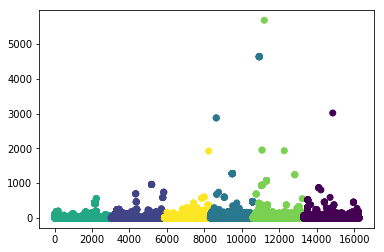

In [38]:
plt.scatter(train_X[:,0],train_X[:,1],c=y_pred)